<h2 align="center"> Data Mining and Machine Learning </h2>
<h3 align="center"> Final Project </h3>
<h2 align="center"> <b> <i> CrashSpot </i> </b> </h2>
<h4 align="center"> Lorenzo Ceccanti matr. 564490 </h4>

### <b> Exploring the dataset in the aggregated form, in which the granularity is per accident </b>

In [12]:
import os
import pandas as pd

dataset_folder = "../dataset/BRASIL_AGGR"

In [13]:
df = pd.read_csv(os.path.join(dataset_folder, 'accidents_2017_to_2023_english_BRASIL.csv'))

In [14]:
# We correct a naming aspect on an attribute
# Here we just correct a name of a column, from ignored to unharmed.
df.rename(columns={"ignored": "unharmed"}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

In [16]:
df.describe()

,road_id,people,deaths,slightly_injured,severely_injured,uninjured,unharmed,total_injured,vehicles_involved,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


In [17]:
df.describe(include = 'object')

,inverse_data,week_day,hour,state,km,city,cause_of_accident,type_of_accident,victims_condition,weather_timestamp,road_direction,wheather_condition,road_type,road_delineation,regional,police_station
count,463152,463152,463152,463152,462162,463152,463152,463152,463152,463152,463152,463152,463152,463152,463142,461842
unique,2434,7,1440,27,9769,2083,85,21,3,4,3,10,3,10,28,151
top,2017-12-23,saturday,19:00:00,MG,1,BRASILIA,Driver's lack of attention to conveyance,Rear-end collision,With injured victims,Day,Increasing,Clear sky,Simple,Straight,SPRF-MG,DEL01-PR
freq,449,77133,6686,61321,1905,6642,107788,86472,332213,253139,246688,269961,234109,278794,61177,21099


### Presence of hidden NaN / unknown value? Let's check it out.

In [18]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False).head(10))


inverse_data
inverse_data
2017-12-23    449
2017-02-25    409
2017-12-22    397
2017-05-19    390
2017-09-30    366
2017-04-08    355
2017-12-30    352
2017-02-24    347
2017-12-16    343
2017-04-13    340
Name: count, dtype: int64
week_day
week_day
saturday     77133
sunday       76960
friday       71435
monday       62816
thursday     60329
wednesday    57878
tuesday      56601
Name: count, dtype: int64
hour
hour
19:00:00    6686
18:00:00    6573
18:30:00    6260
17:00:00    5538
16:00:00    5124
17:30:00    5028
19:30:00    5002
20:00:00    4963
08:00:00    4845
15:00:00    4752
Name: count, dtype: int64
state
state
MG    61321
SC    55418
PR    52933
RS    32408
RJ    32233
SP    30745
BA    24338
GO    22748
PE    18675
ES    17308
Name: count, dtype: int64
road_id
road_id
101.0    76540
116.0    68814
381.0    22978
40.0     21991
153.0    18271
364.0    15354
163.0    14847
277.0    13631
376.0    12876
262.0    12254
Name: count, dtype: int64
km
km
1      1905
2      1810
3    

I have just performed a cycle across all the columns. It seems that there are no null values mistaken as categorical values by Pandas.

### Plotting the distribution of some numerical variable

In [19]:
from matplotlib import pyplot as plt

Let's look at the distribution of the variables `people`, `deaths`, `slightly_injured`, `severely_injured` which are numerical variables.

The attribute `victims_condition` is one of the attribute that will be considered as class attribute.

In [20]:
victim_conditions_classes = df.loc[:,'victims_condition'].value_counts()
victim_conditions_classes

victims_condition
With injured victims    332213
Without victims          99595
With dead victims        31344
Name: count, dtype: int64

We'll need to adopt sampling techinque to address the problem of predict the class for victims_condition during the second part of the project.

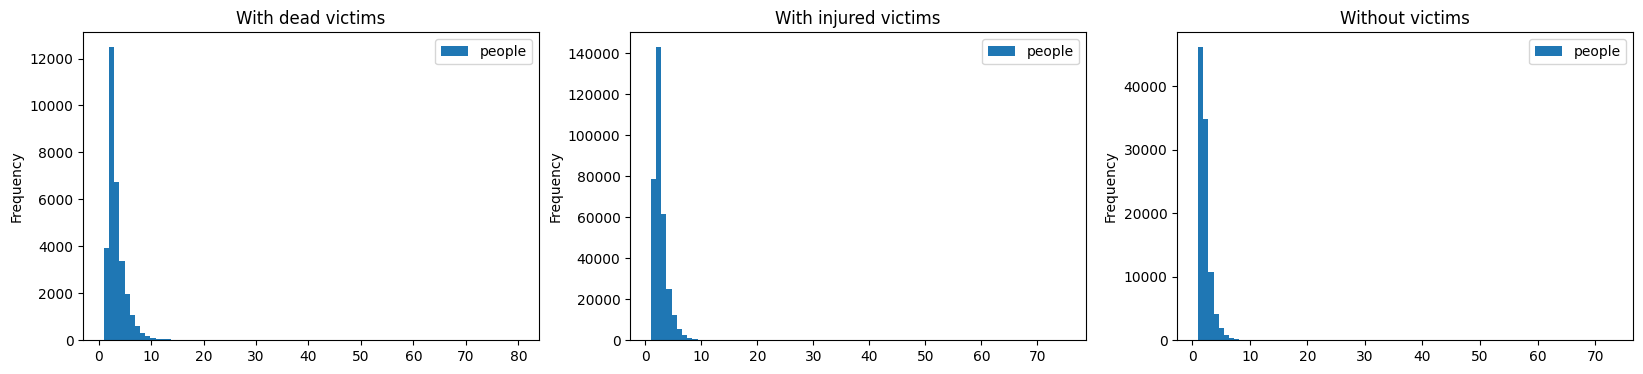

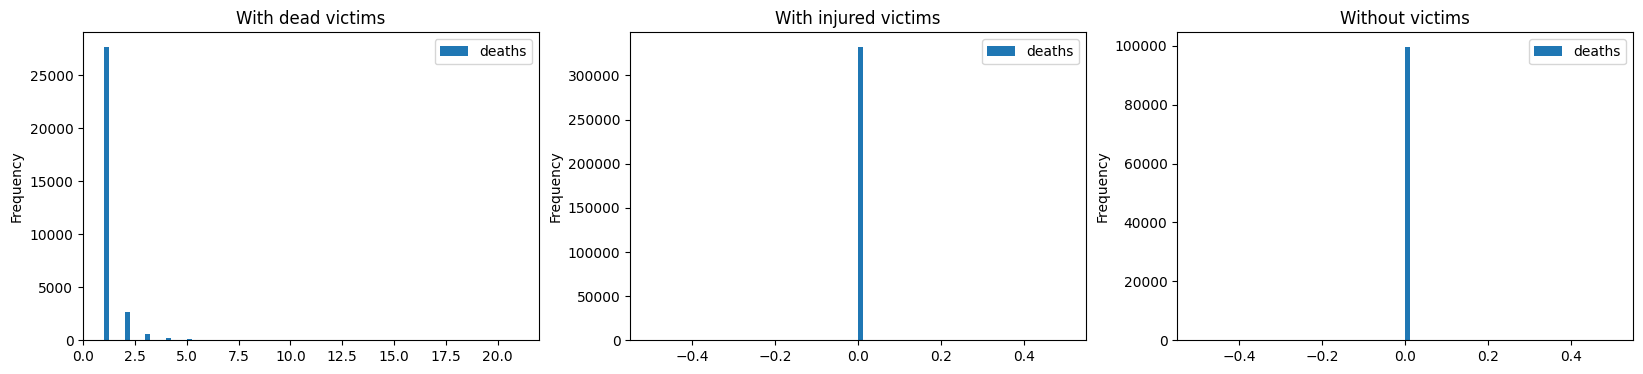

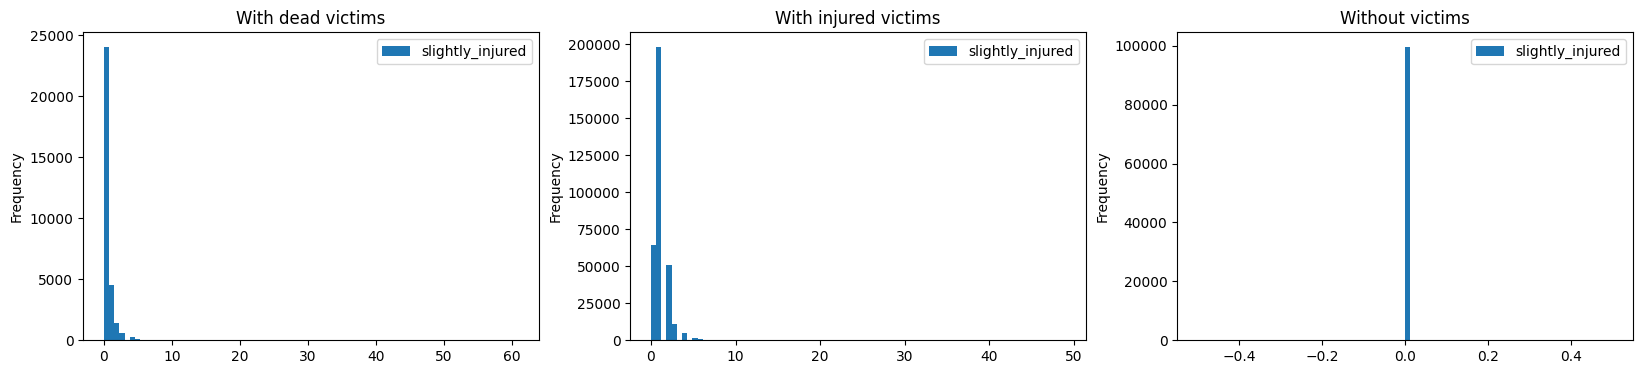

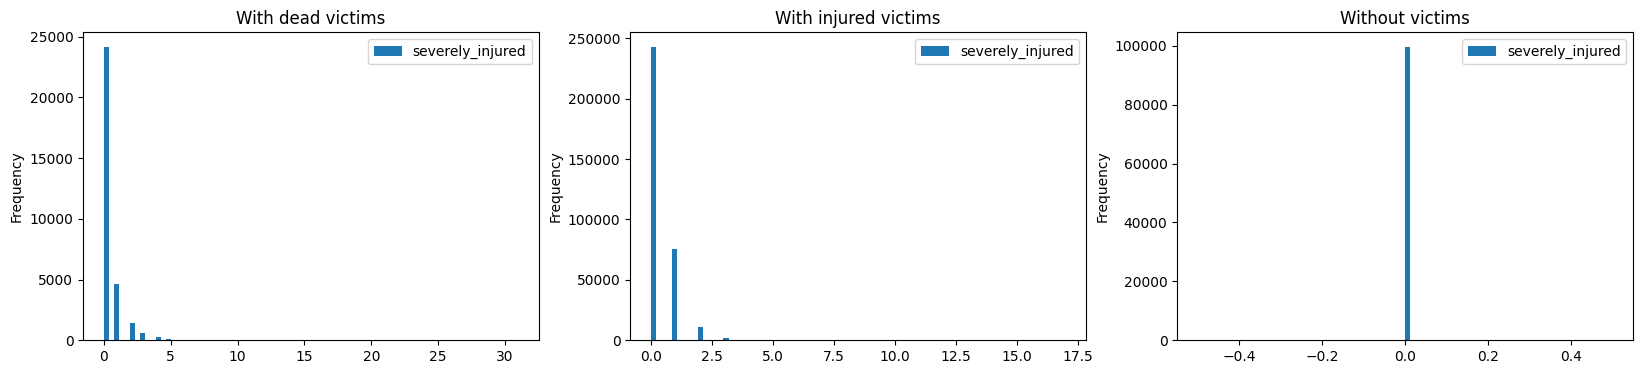

In [21]:
no_victims_conditions_labels = victim_conditions_classes.size
cols = ['people', 'deaths', 'slightly_injured', 'severely_injured']
for col in cols:
    df.plot(    
                kind = 'hist',
                column = col,
                by = 'victims_condition',
                bins = 80,
                figsize = (20,4),
                layout = (1, no_victims_conditions_labels)
            )
    plt.show()

From looking at the graphs above, we can see that when an instance belongs to `Without victims`, `deaths`, `slightly_injured`, `severely_injured` are all 0. Also, if the instance belongs to `With injured victims`, there's no instance having `deaths` attribute different from 0. This suggests us that there were not inconsistencies during the data collection phase.

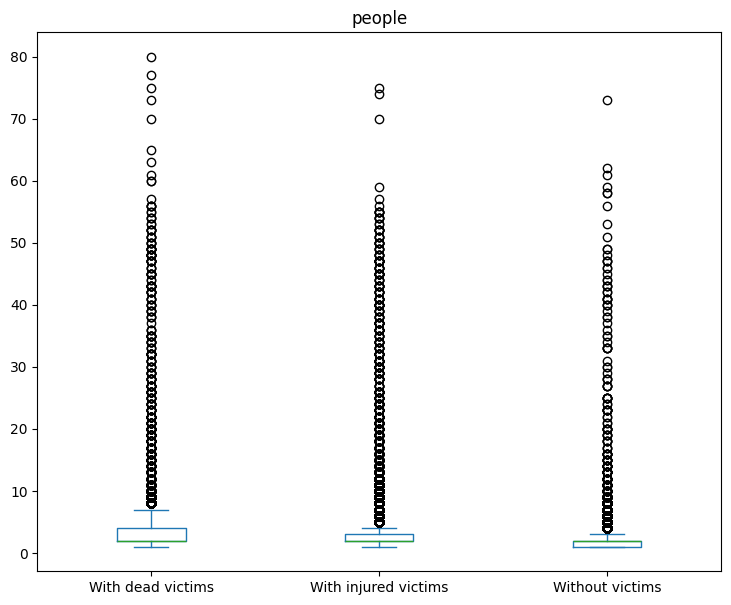

In [22]:
no_victims_conditions_labels = victim_conditions_classes.size
df.plot(    kind = 'box',
            column = 'people',
            by = 'victims_condition',
            figsize = (30, 7),
            layout = (1, no_victims_conditions_labels)
        )
plt.show()

From the boxplot above we can observe better what is the distribution of the number of people involved for single accident recorded.

The majority of fatal accidents have typically 1 to 5 victims, but in sporadic cases we had more than 60+ deaths for single event.

### Plotting interactive pie charts of the main categorical variables

The categorical attributes that will be considered are `cause_of_accident`, `type_of_accident`

In [23]:
import plotly.express as px

# Adapting the number of categories to show
top_n = 20

# Categorical Attributes to plot
categorical_attr = ['cause_of_accident', 'type_of_accident']
display_titles = ['Cause of accident', 'Types of accident']
for attr, display_title in zip(categorical_attr, display_titles):
    attr_counts = df.loc[:, attr].value_counts().reset_index()
    print(f'Shape of {attr}: {attr_counts.shape}')

    # Sorting the causes according to COUNT DESC
    attr_sorted = attr_counts.sort_values("count", ascending=False)

    # Splitting the most N frequent causes from the less frequent ones (to visualize better the pie chart)
    top_attr = attr_sorted.iloc[:top_n]
    other_attr = attr_sorted.iloc[top_n:]

    # Concatenation of two DataFrames
    sum_others = other_attr.loc[:,'count'].sum()
    other_row = pd.DataFrame(
        {
            attr: ["Other"],
            "count": [sum_others]
        }
    )

    # We add the parameter ignore_index otherwise when merging the two DataFrame, the index 0 for other_row is maintained
    # also in the merged DataFrame
    df_top_attr_counts = pd.concat([top_attr, other_row], ignore_index=True)
    df_top_attr_counts.head(5)

    # top_n chart
    pie_chart = px.pie(
                        df_top_attr_counts,
                        names = attr,
                        values= 'count',
                        title = f'{display_title} (top ' + str(top_n) + ')',
                        height = 800
                )
    pie_chart.show()

    pie_chart = px.pie(
                        other_attr,
                        names = attr,
                        values= 'count',
                        title = f'{display_title} (others)',
                        height = 1000
                )
    pie_chart.show()

Shape of cause_of_accident: (85, 2)


Shape of type_of_accident: (21, 2)


The percentage for _others_ is computed excluding the `top_n` frequent causes